## US VISA APPROVAL PREDICTION EDA ANALYSIS

Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

DataSet obtained from kaggle
1. The Dataset is part of Office of Foreign Labor Certification (OFLC)
2. The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

Importing the Dataset

In [2]:
df =pd.read_csv(r"EasyVisa.csv")

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Shape of Dataset

In [4]:
df.shape

(25480, 12)

In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# Exploring the Data

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('We Have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe Have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We Have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We Have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


Calculating the proportion of Count data on categorical columns

In [8]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('--------------------------------\n')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
--------------------------------

regio

Insights
1. Case_id: have unique values for each column so it isn't of much use
2. continent: column is highly biased towards asia,hence we can combine other categories to form a single category.
3. unit_of_wages: seems to be an important discriminator

## Univariate Analysis
It is the distribution of values for a single variable or column

Numerical Features

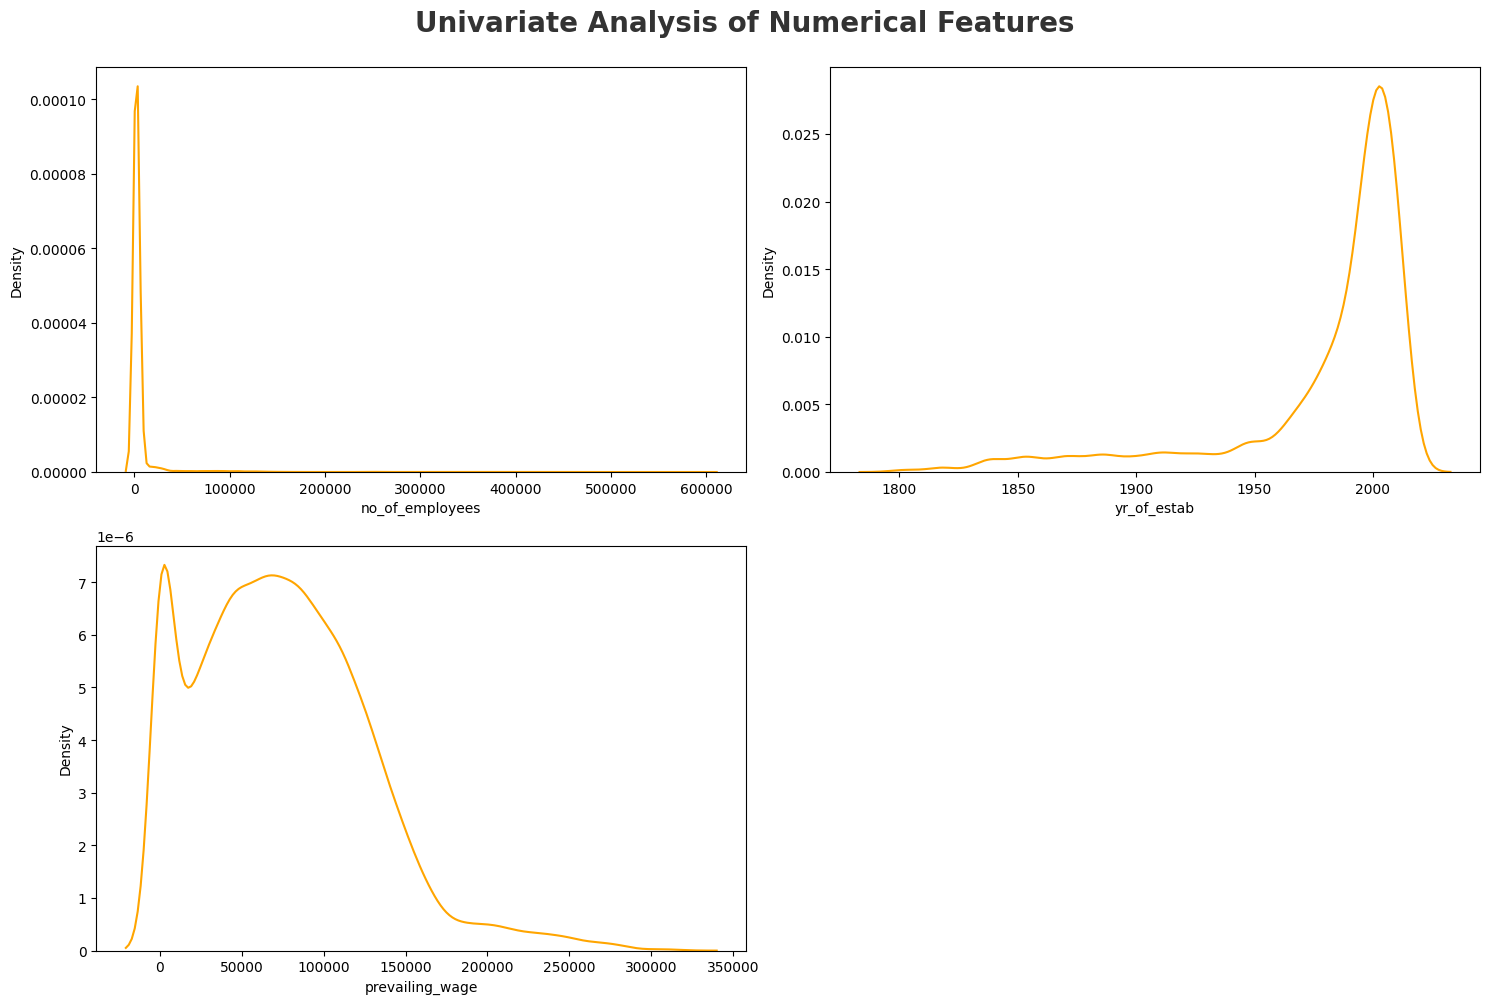

In [9]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]],color='orange')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Insights
1. no_of_employees is skewed maybe because of outliers
2. yr_of_estab is an discrete feature
3. privailing_wage is a right-skewed distribution

Categorical Features

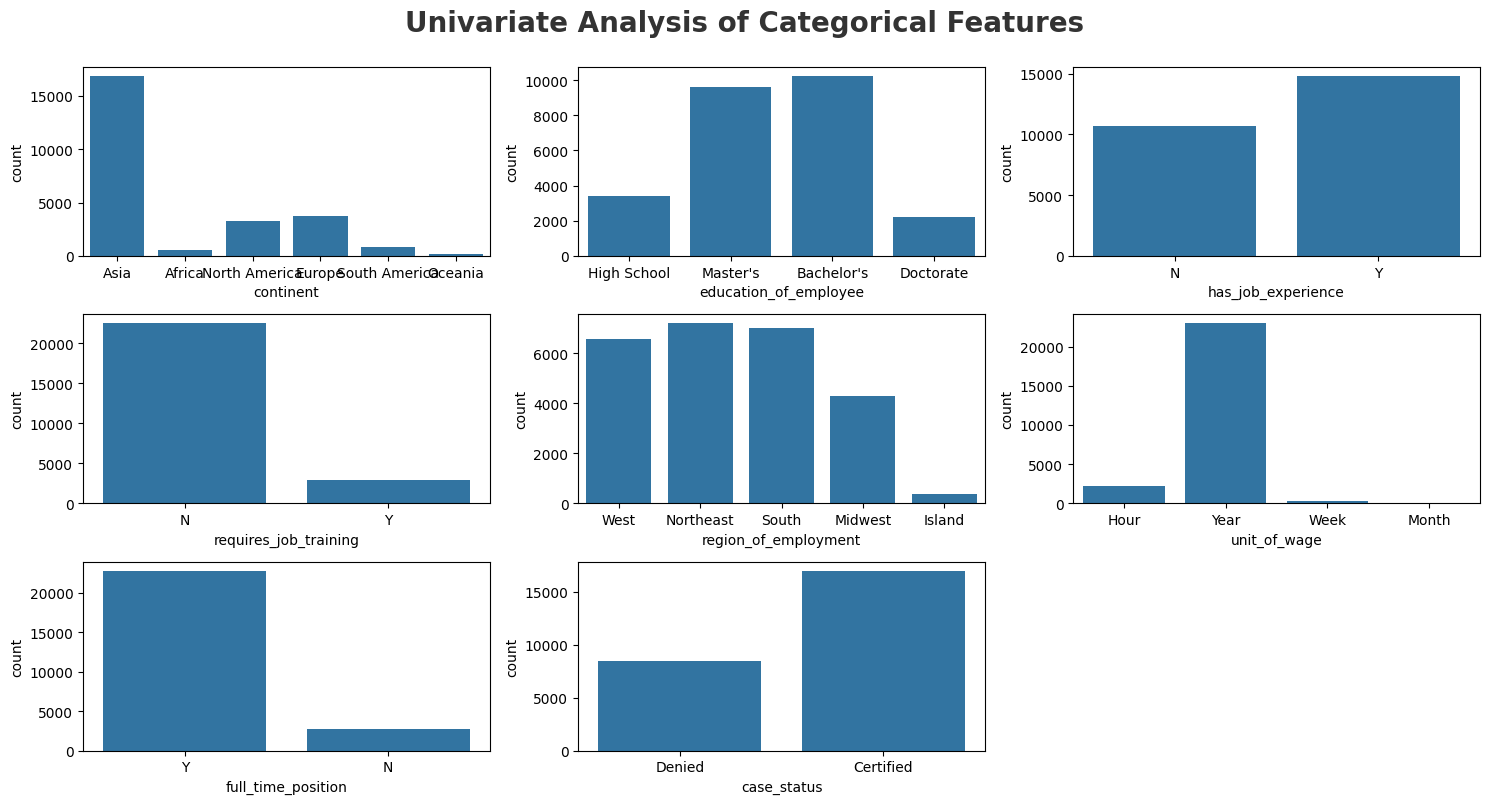

In [10]:
categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

Insights
1. requires_job_training, unit_of_wage,full_time_position and continents columns are imbalanced
2. Rest of the columns are balanced 

# Multivariate Analysis
Multivariate analysis is a statistical technique that involves the analysis of multiple variables to identify patterns, relationships,

In [11]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>25]

print('We have {} discrete Features : {}'.format(len(discrete_features),discrete_features))
print('We have {} continuous Features : {}'.format(len(continuous_features),continuous_features))

We have 0 discrete Features : []
We have 3 continuous Features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


# Check Multicollinearity in Numerical Features

In [12]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Insights

There is no multicollinearity between any variables

# Check Multicollinearity for Categorical Features

Done using Chi-Squared Test

In [13]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05:
        chi2_test.append("Rejects Null Hypothesis")
    else:
        chi2_test.append("Fails to reject Null Hypothesis")
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Columns','Hypothesis Result']
result

,Columns,Hypothesis Result
0,continent,Rejects Null Hypothesis
1,education_of_employee,Rejects Null Hypothesis
2,has_job_experience,Rejects Null Hypothesis
3,requires_job_training,Fails to reject Null Hypothesis
4,region_of_employment,Rejects Null Hypothesis
5,unit_of_wage,Rejects Null Hypothesis
6,full_time_position,Rejects Null Hypothesis
7,case_status,Rejects Null Hypothesis


Final Outcome
Here requires_job_training fails to reject the NULL Hypothesis which means it doesn't correlate with target columns

In [14]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [15]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuous Features : ',continuous_features)

Num of continuous Features :  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


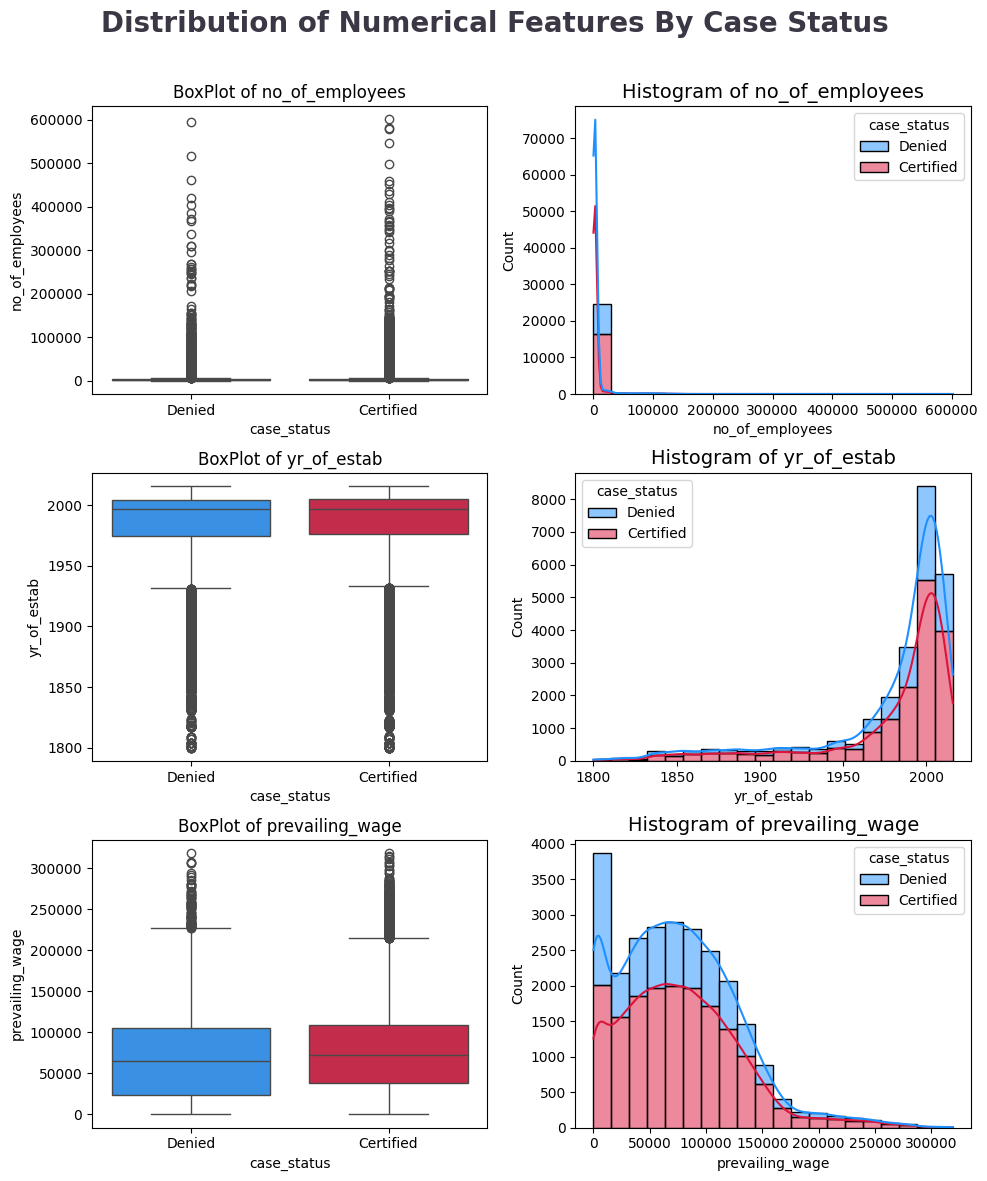

In [16]:
clr1=['#1E90FF','#DC143C']
fig,ax = plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status',color='#3C3744',fontsize=20,fontweight='bold',ha='center')
for i,col in enumerate(continuous_features):
    sns.boxplot(data=df,x='case_status',y=col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'BoxPlot of {col}',fontsize=12)
    sns.histplot(data=df,x=col,hue='case_status',bins=20,kde=True,multiple='stack',palette=clr1,ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}',fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

## Initial Analysis Report
1. No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
2. yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
3. prevailing_wage is right skewed with outliers above upper bound of box plot.
4. There are No missing values in the dataset.
5. The case_id column can be deleted because each row has unique values.
6. The case_status column is the target to predict.
7. In the Categorical column, features can be made Binary numerical in feature Encoding

Visualization

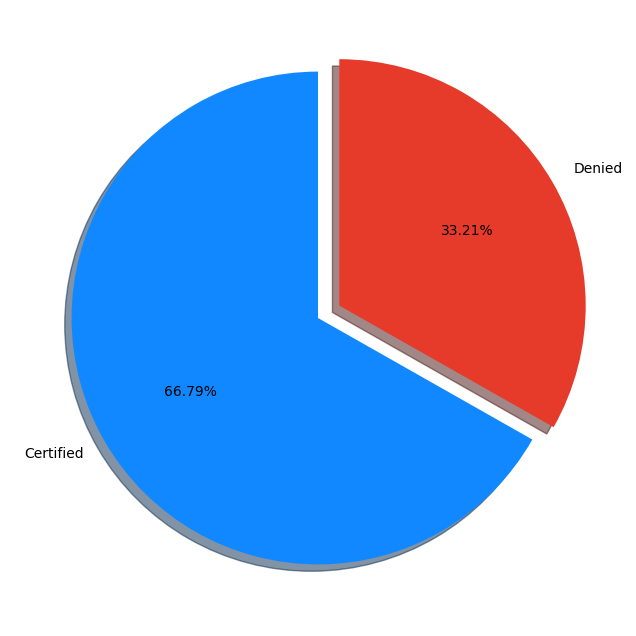

In [17]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

1. Impact of applicants continent

In [18]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

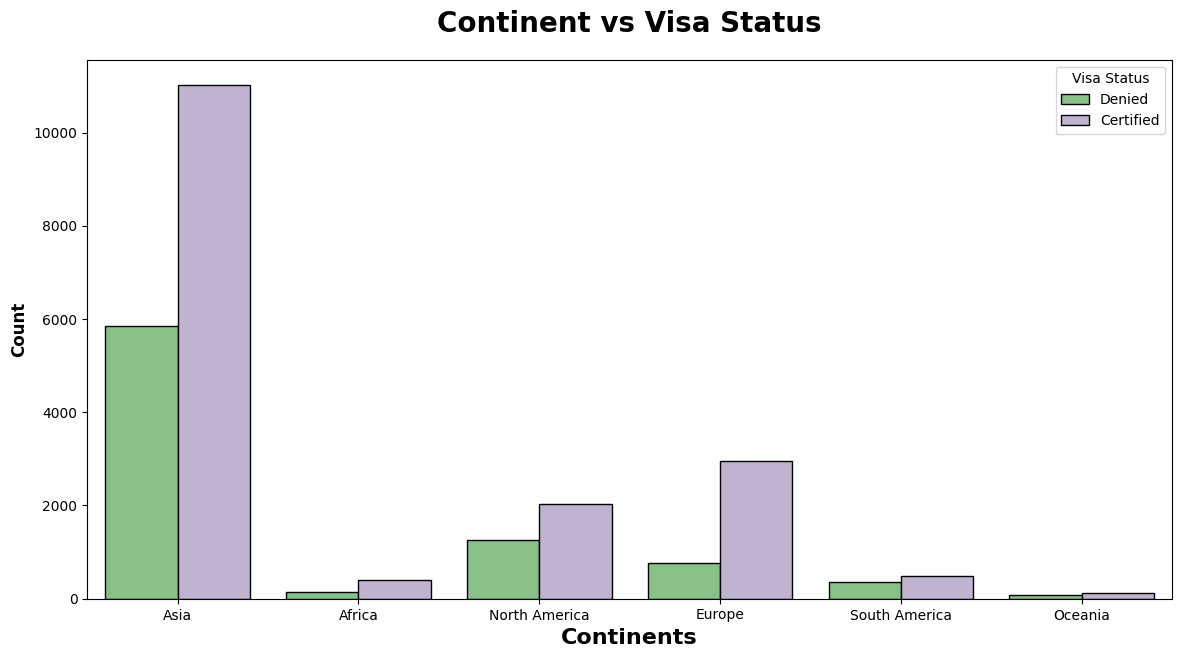

In [19]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [20]:
df2 = df.copy()

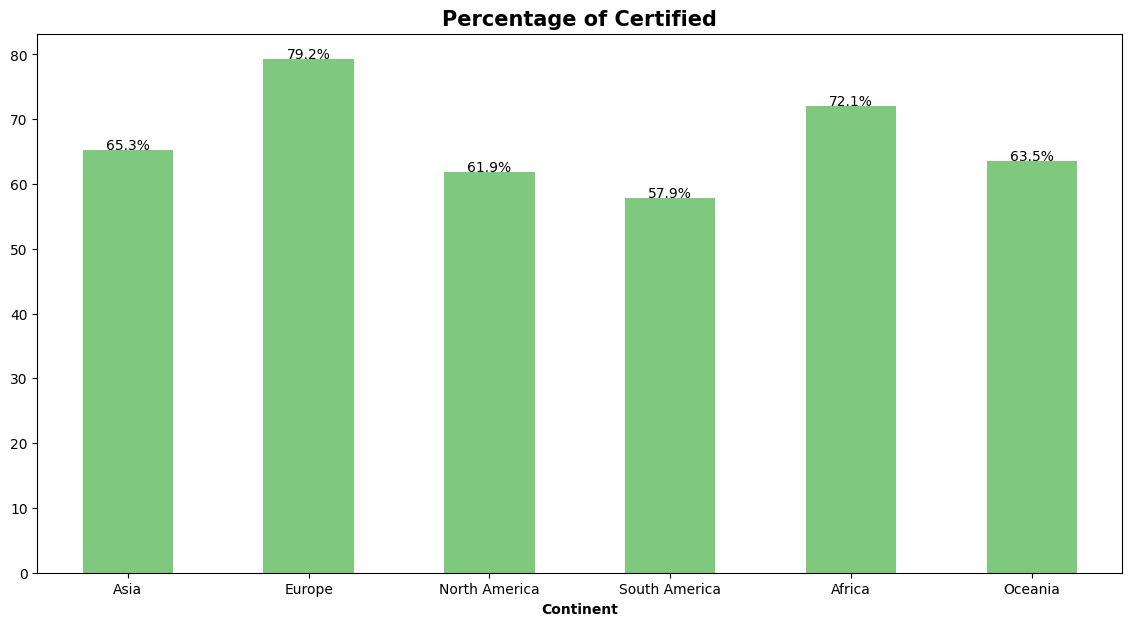

In [21]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Report
1. As per the Chart Asia applicants applied more than other continents.
2. 43% of Certified applications are from Asia.
3. This is followed by Europe with 11% of Certified applications.
4. Highest chance of getting certified if you are from Europe and followed by Africa

2. Impact of Candidates Education

In [22]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

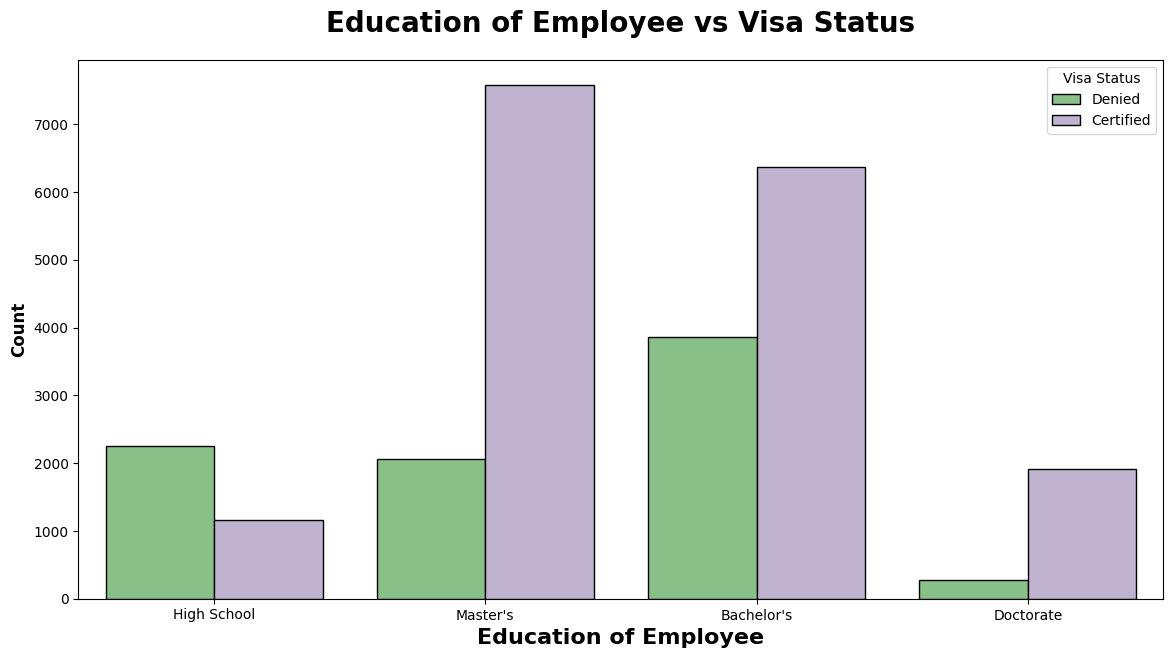

In [23]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

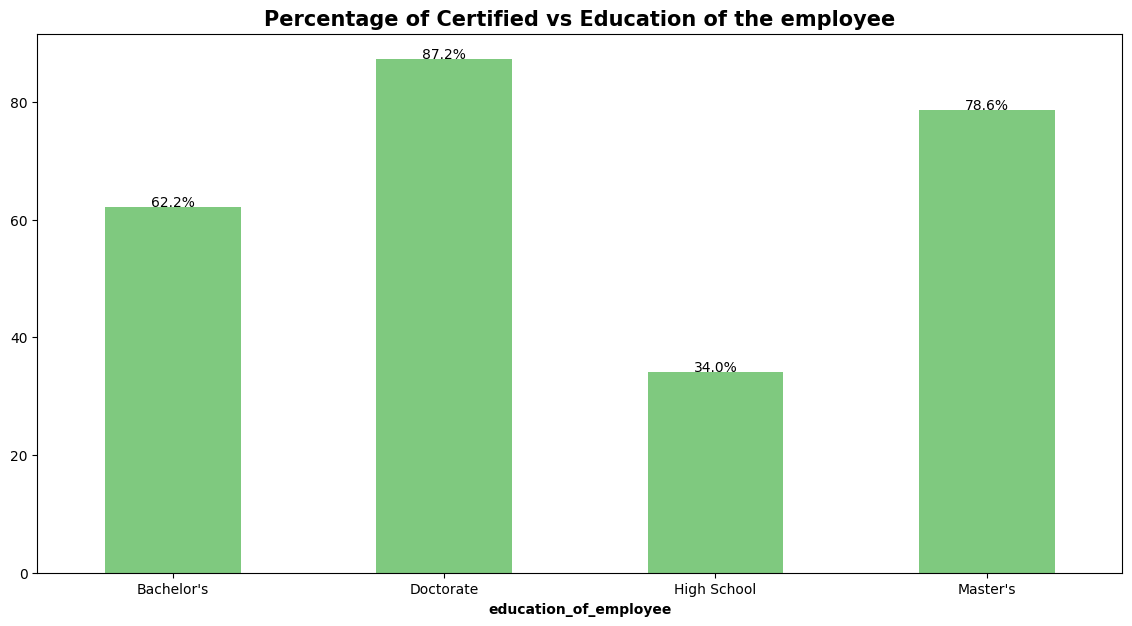

In [24]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Report
1. education status has high impact
2. Doctorate and Master's graduates have higher cange of being accepted then the other

3. Impact of Candidates previous work experience

In [25]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

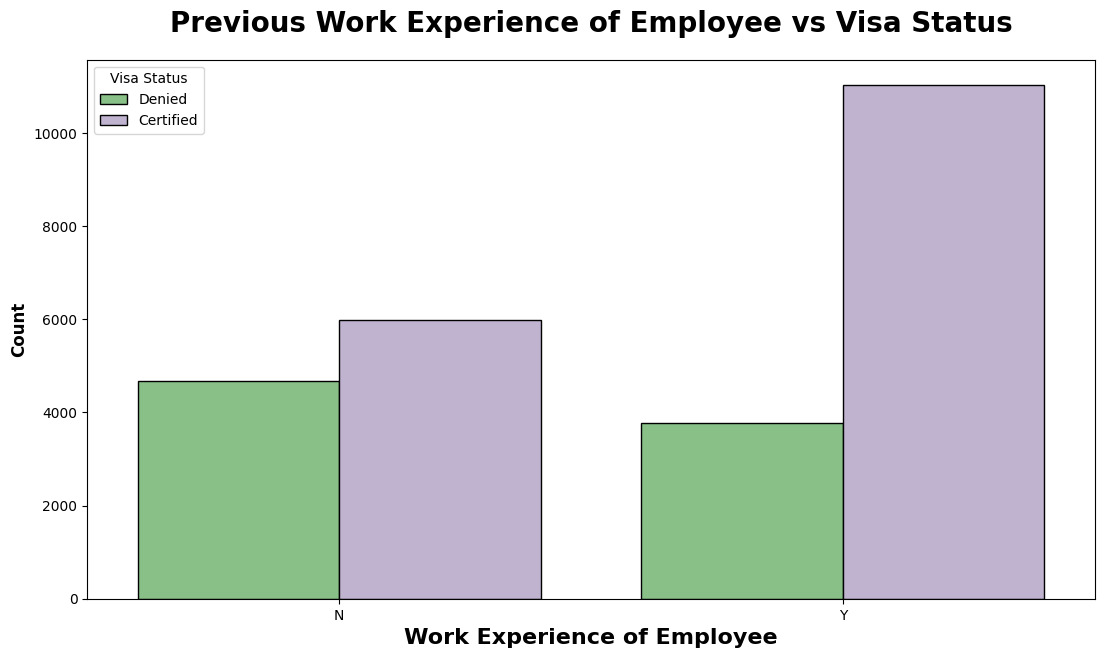

In [26]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

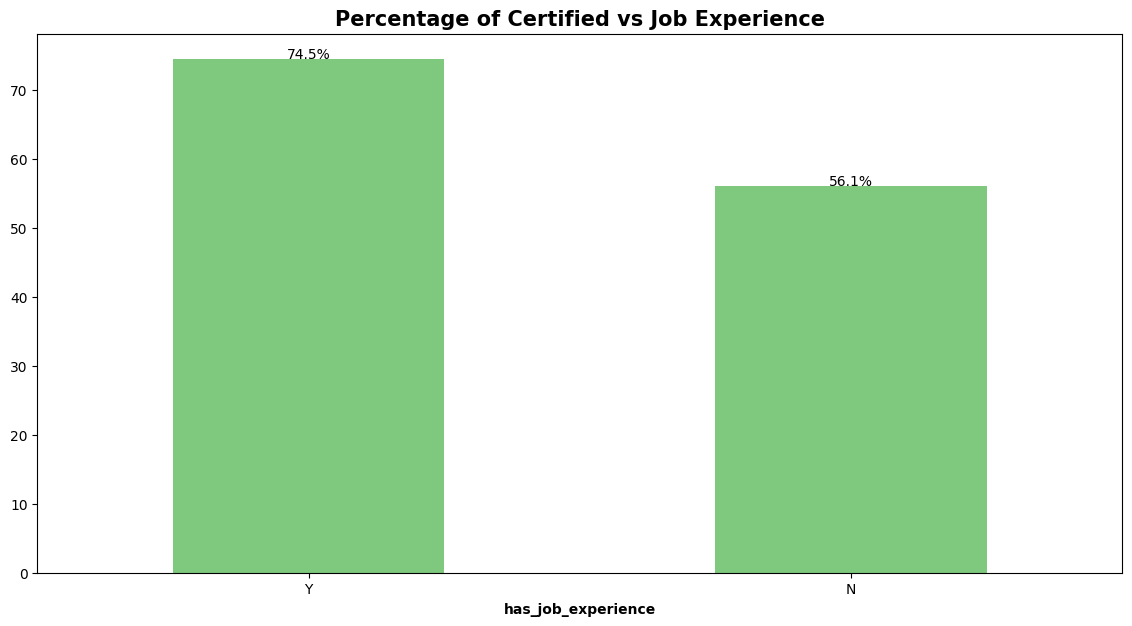

In [27]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Report
1. People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
2. People with No previous work experience has been certified 56% and denied 43%.
3. This means work experience has effect on Visa status.
4. There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

4. Impact of Job Training

In [28]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

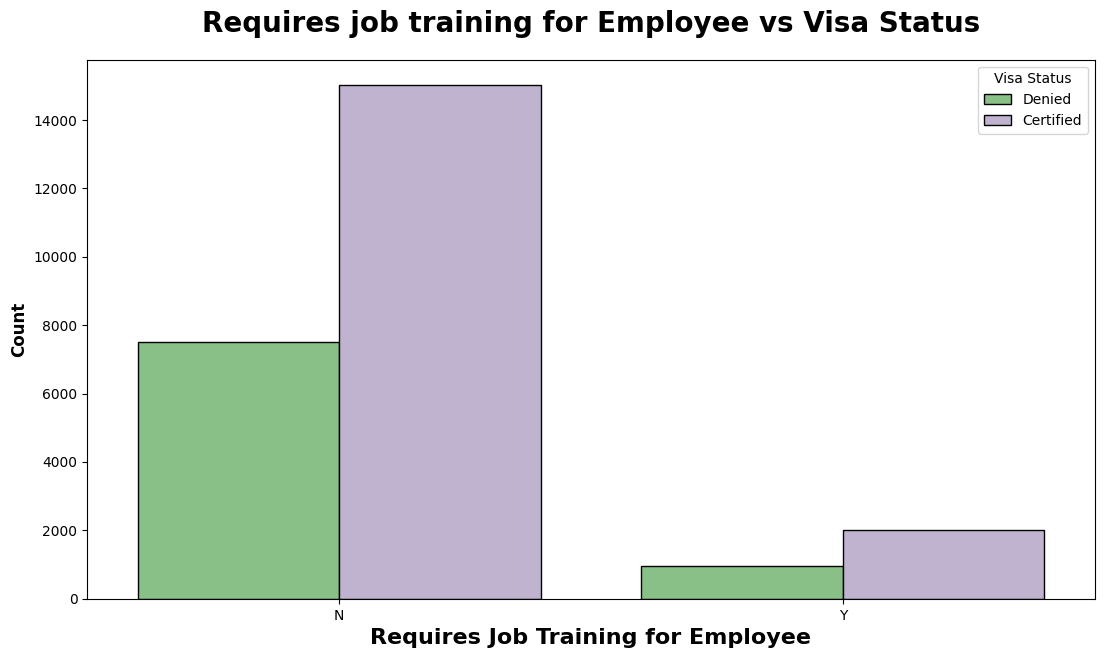

In [29]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

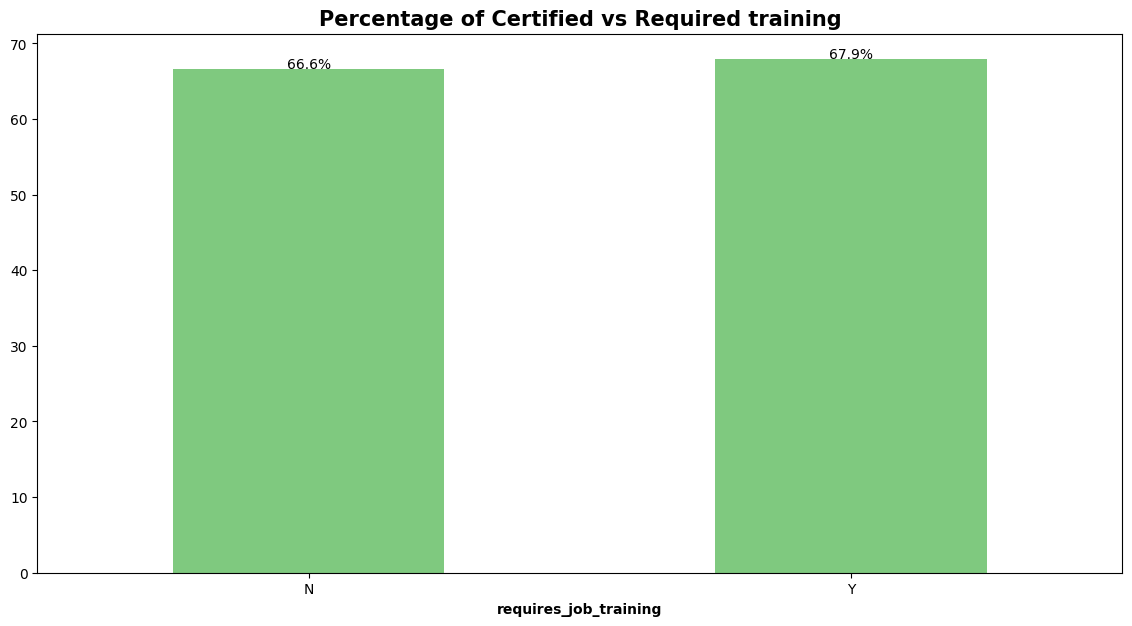

In [30]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Report
1. If employee requires job training and it doesn't have any effect on Visa status.
2. 88% of applicant don't require job training.
3. 63% of people who doesnt want job training got certified.
4. For employees who require job training 67% of people get certified.
5. As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

5. Impact of No of Employees under an Employer

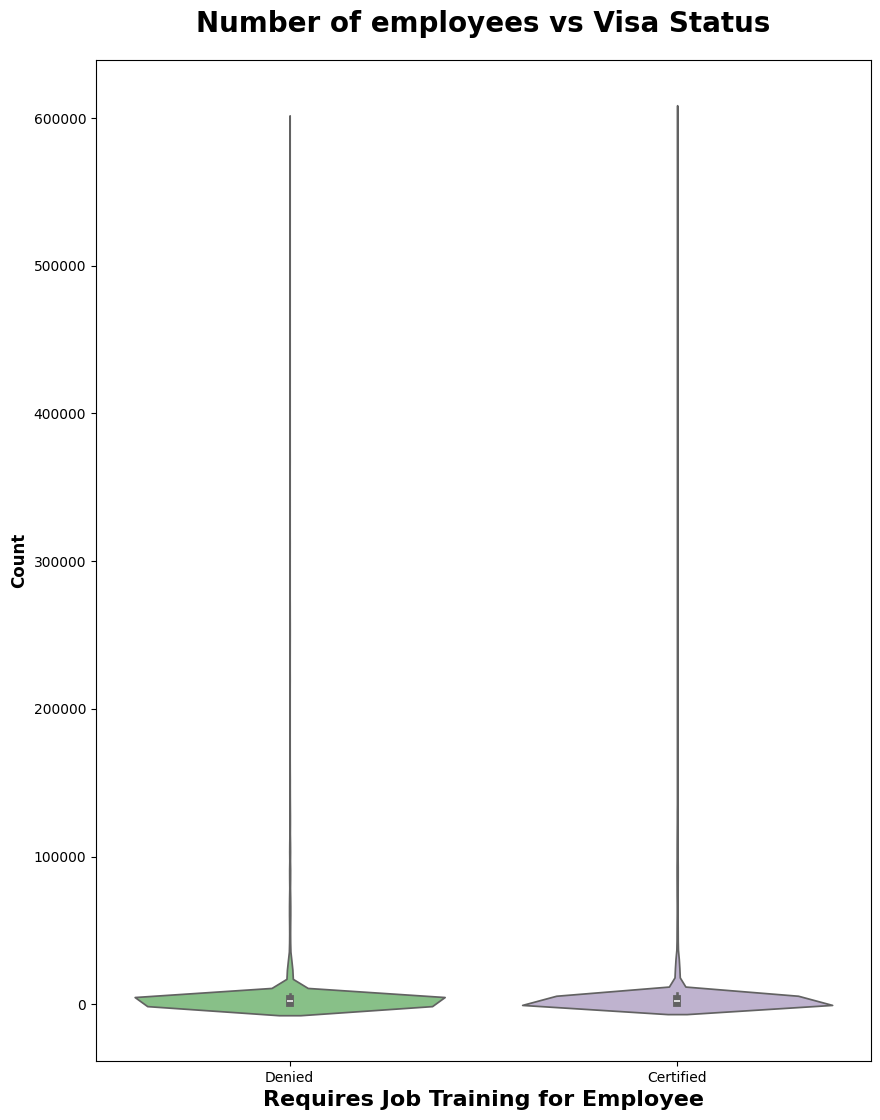

In [31]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

Report

The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

6. Impact of wages or salaries provided

In [32]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)*100

unit_of_wage  case_status
Hour          Denied         65.368567
              Certified      34.631433
Month         Certified      61.797753
              Denied         38.202247
Week          Certified      62.132353
              Denied         37.867647
Year          Certified      69.885027
              Denied         30.114973
Name: proportion, dtype: float64

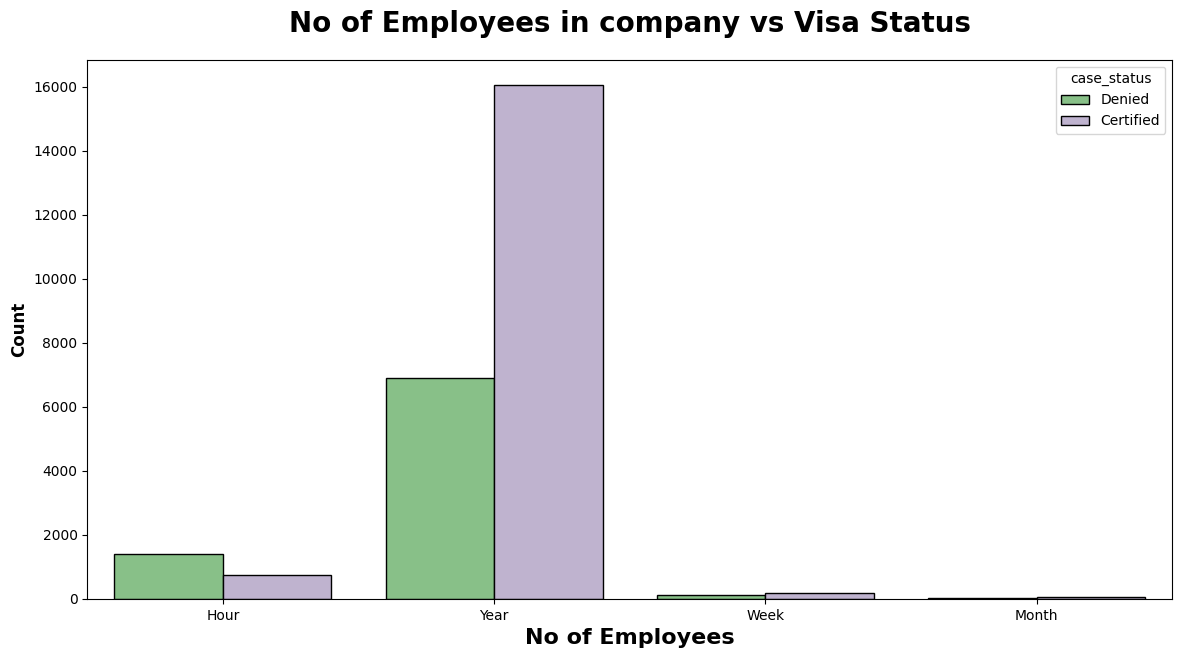

In [33]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

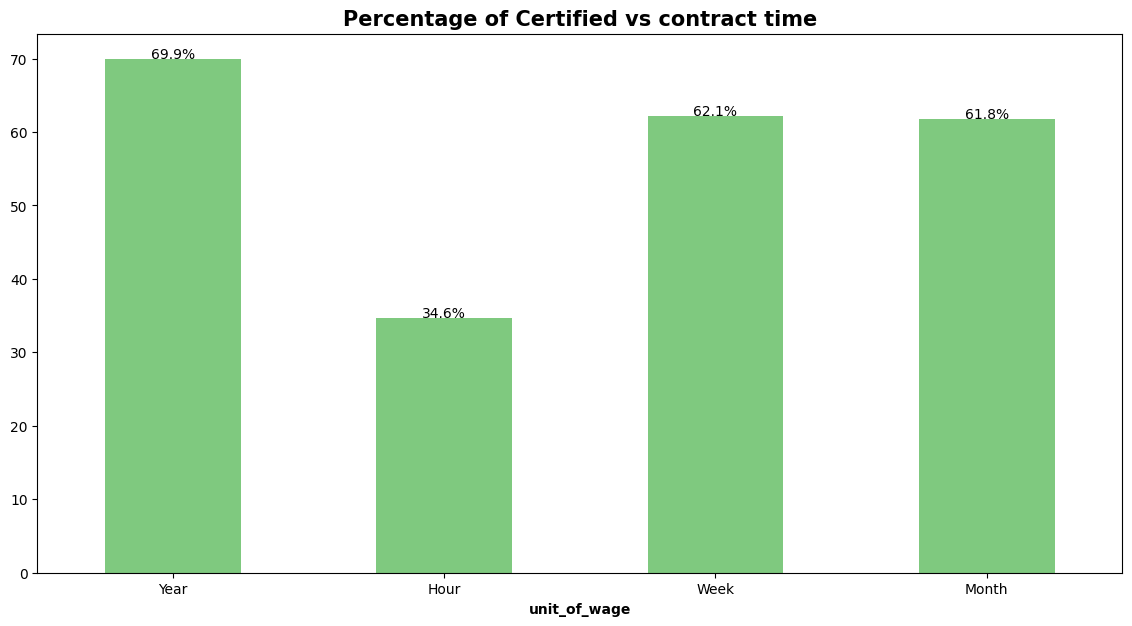

In [34]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Report
1. For employees who applied for hourly pay 65% of them were denied.
2. Yearly unit wage application were accepted for 69% and denied for 31% of the time.
3. There is a higher chance of yearly contract than other and immediately followed by week and month.

7. Impact of Region of Employment

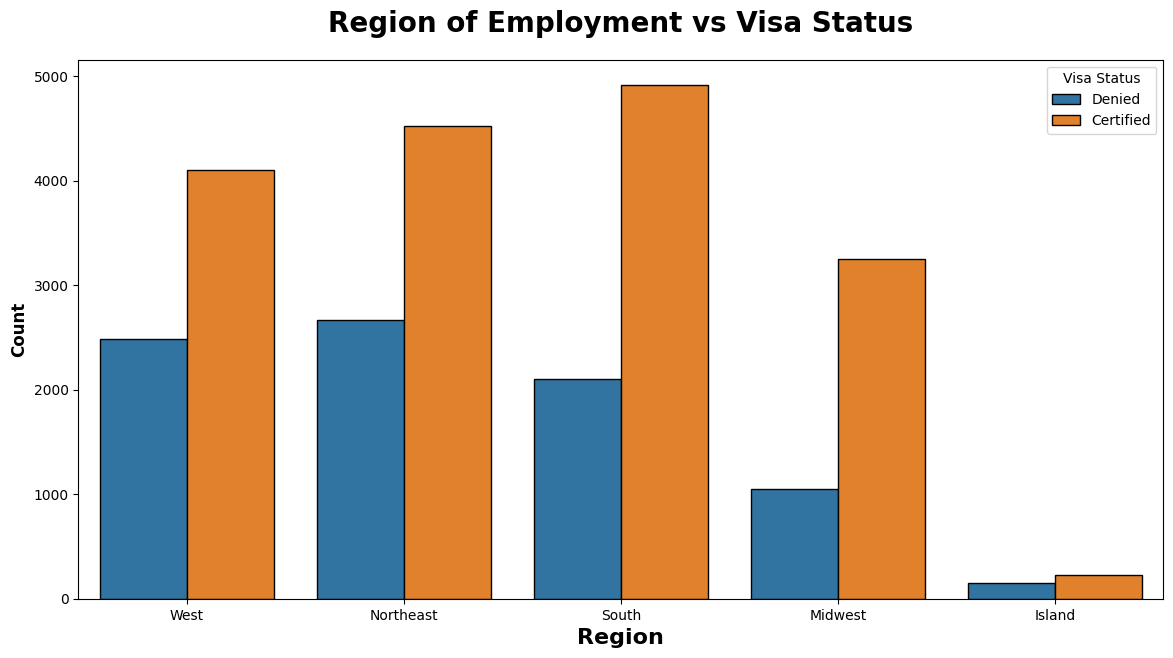

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

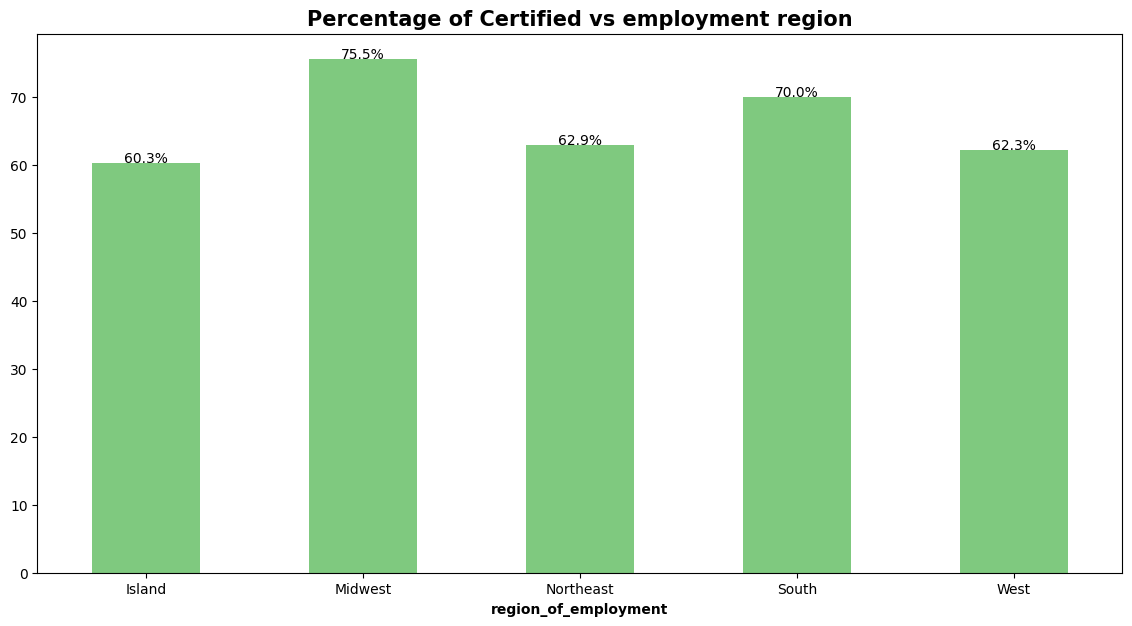

In [36]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Report
1. As per chart all the region have very similar pattern of getting Visa certified and Denied.
2. There is a slight edge for midwest followed by South region

8. Impact of Prevailing Wages

In [37]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

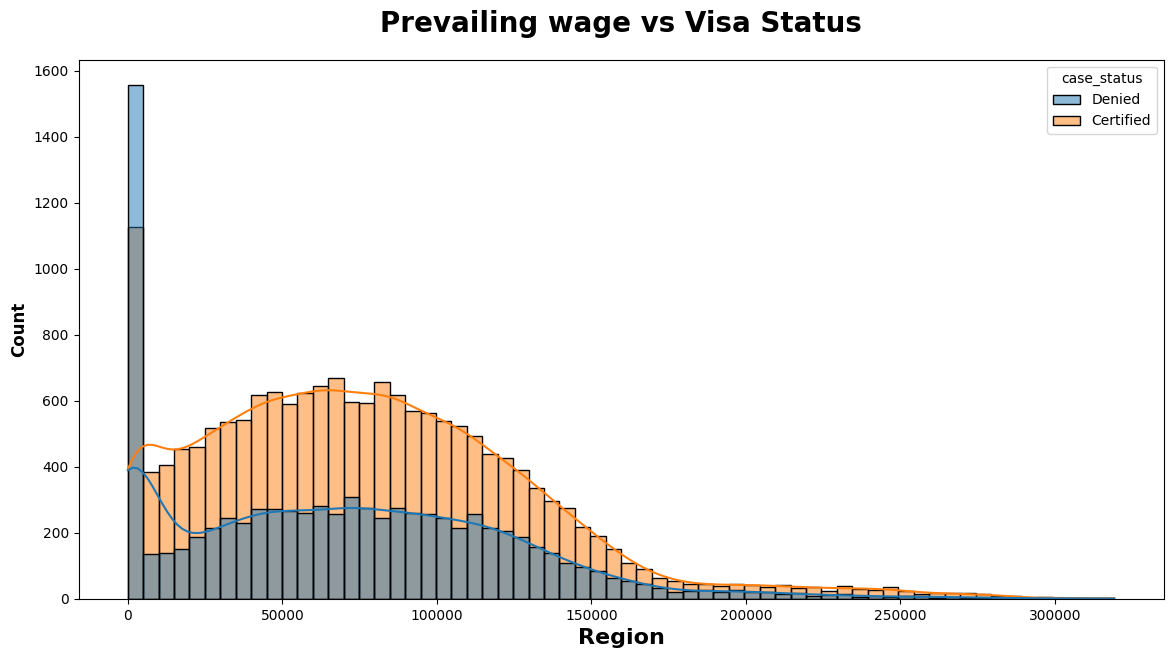

In [38]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

Report

The distribution of both the classes are same but need to handel the outliers.

Prevailing wages with respect to education

In [39]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)


Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


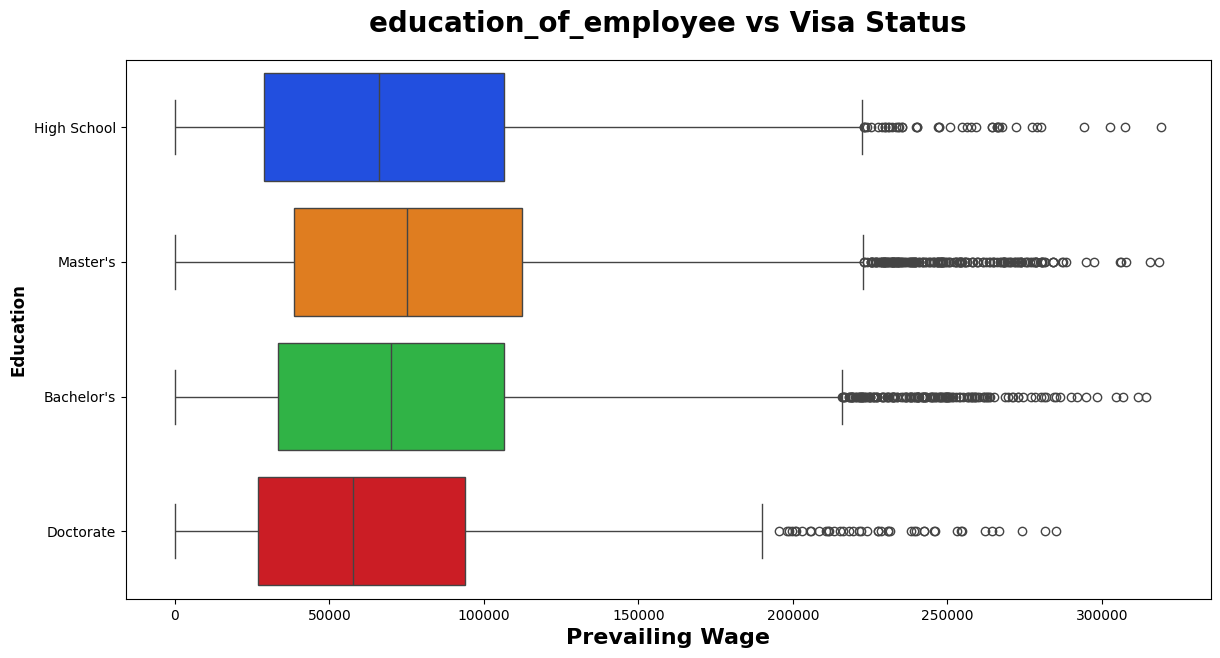

In [40]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

Report
1. Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
2. Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

Prevailing Wages with respect to Job Experience

In [41]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


Report
1. Suprisingly people who has less job experience has more prevailing wage.
2. No job experience applicant has median prevailing wage as 72k USD.
3. Previous job experience applicant has median prevailing wage as 69K USD.

Prevailing wages with respect to continent

In [42]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


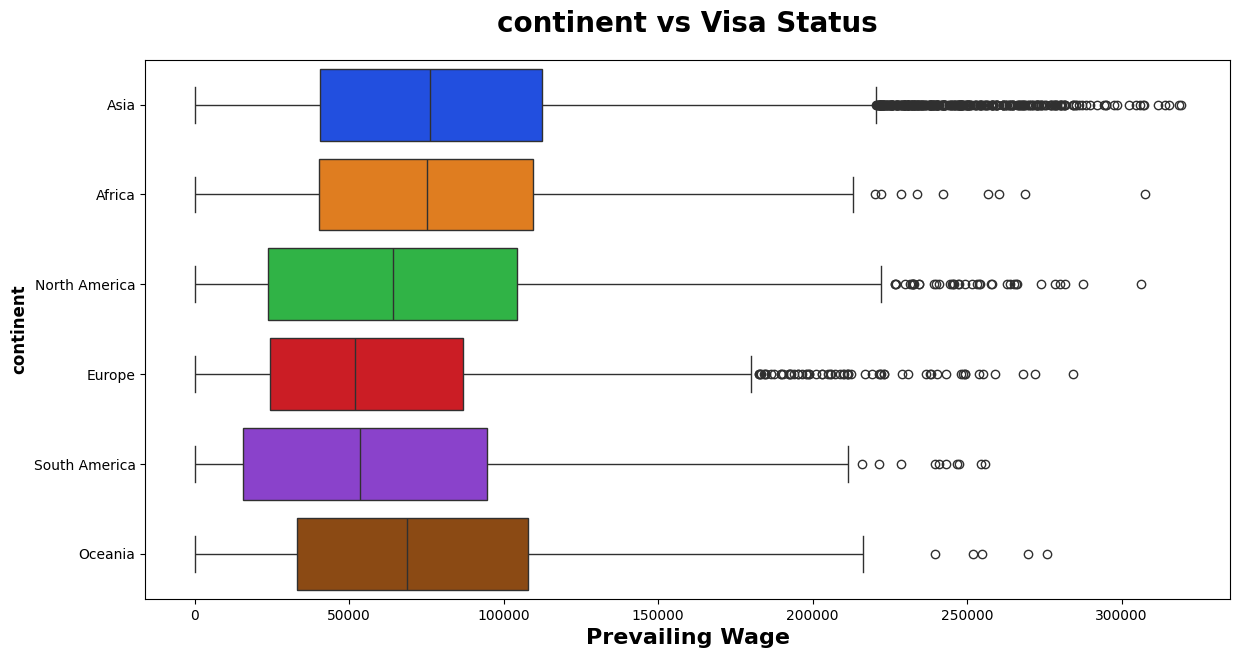

In [43]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

Report

Average salary of people from Asia is higher than other continents.

9. Impact of Year of Establishment

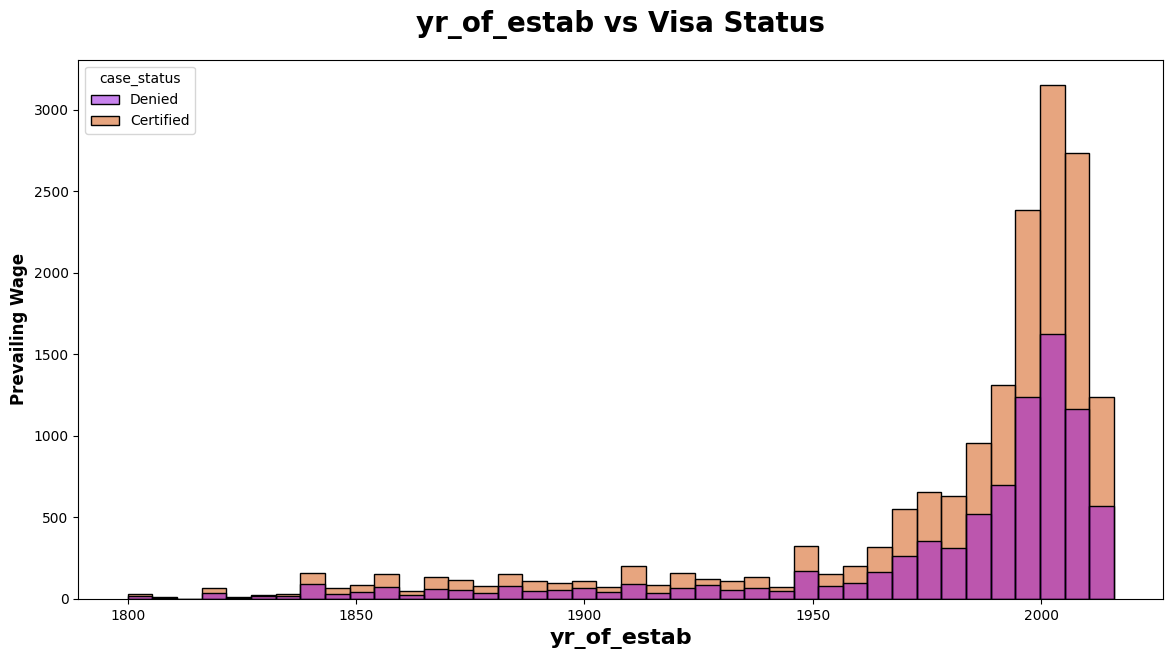

In [44]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

Report
1. Each bins consists of 5 years.
2. Many companies were established after year 2000.
3. The most company establishment happened in year 2000-2005.

## Final Report
1. case_id column can be dropped as it is an ID.
2. requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
3. no_of_employees, prevailing_wage columns have outllier which should be handled.
4. continent columns has few unique values with very less count, which can be made as others
5. Target column case_status is imbalanced can be handled before model building.